In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [6]:
cd Raw concatenated

C:\Users\student\Desktop\AV\brainwaves-csv\Raw concatenated


In [7]:
df_raw_backward= pd.read_csv('final_raw_backward.csv')

In [8]:
df_raw_backward['label']=0

In [9]:
df_raw_forward= pd.read_csv('final_raw_forward.csv')

In [10]:
df_raw_forward['label']=1

In [11]:
df_raw_left= pd.read_csv('final_raw_left.csv')

In [12]:
df_raw_left['label']=2

In [13]:
df_raw_right= pd.read_csv('final_raw_right.csv')

In [14]:
df_raw_right['label']=3

In [15]:
df_raw_land= pd.read_csv('final_raw_land.csv')

In [16]:
df_raw_land['label']=4

In [17]:
df_raw_takeoff= pd.read_csv('final_raw_takeoff.csv')

In [18]:
df_raw_takeoff['label']=5

In [19]:
df=pd.concat([df_raw_backward,df_raw_forward,df_raw_left,df_raw_right,df_raw_land,df_raw_takeoff], ignore_index=True)

In [20]:
df = shuffle(df, random_state=42)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2498750 entries, 365063 to 2219110
Data columns (total 17 columns):
 #   Column           Dtype  
---  ------           -----  
 0    EXG Channel 0   float64
 1    EXG Channel 1   float64
 2    EXG Channel 2   float64
 3    EXG Channel 3   float64
 4    EXG Channel 4   float64
 5    EXG Channel 5   float64
 6    EXG Channel 6   float64
 7    EXG Channel 7   float64
 8    EXG Channel 8   float64
 9    EXG Channel 9   float64
 10   EXG Channel 10  float64
 11   EXG Channel 11  float64
 12   EXG Channel 12  float64
 13   EXG Channel 13  float64
 14   EXG Channel 14  float64
 15   EXG Channel 15  float64
 16  label            int64  
dtypes: float64(16), int64(1)
memory usage: 343.2 MB


In [19]:
df.tail()

,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,EXG Channel 8,EXG Channel 9,EXG Channel 10,EXG Channel 11,EXG Channel 12,EXG Channel 13,EXG Channel 14,EXG Channel 15,label
110268,7573.933312,26463.057275,187500.000000,-45657.886047,1650.609273,-14008.061768,-187500.022352,-24351.465625,-12838.104408,7483.721672,-43790.822481,187500.000000,-31713.236179,-41882.341132,-4196.562373,-21094.525885,0
1692743,40725.638357,-187500.022352,-15953.445846,-17151.700515,-20561.950870,-19758.159787,-187500.022352,-19110.741509,-11391.208934,-15716.740872,9552.755601,-28242.479651,-21172.488770,-28743.963390,19438.194566,7344.291490,4
2356330,-37327.815572,-12486.310302,-86566.361674,-80752.315313,-19796.291863,-54360.470696,-158691.037737,-71304.255283,-9583.422194,-187500.022352,-85287.283097,-78625.032738,-54218.827691,-46427.590719,-82807.737030,-83771.879527,5
2229084,6915.070941,42529.424134,-57956.732268,-60729.779092,-36113.579406,-35763.148756,-187500.022352,-15949.087256,-8106.776548,-46144.327062,-54517.469349,-51357.267959,-23679.102800,-30909.087468,-61629.280344,-43929.805628,5
2219110,-16912.402739,-25568.719276,-25375.220224,-4013.345124,-55771.469268,-47076.685378,138483.630238,-47711.787845,-11091.963779,-17932.223431,-36977.250812,-31154.219050,-42578.910897,-30389.185892,-24839.091282,-32000.746667,5


In [22]:
X = df.iloc[:, :-1] 
y = df.iloc[:, -1]  


In [23]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:

# Reshape X for Conv1D
X_scaled = X_scaled.reshape(X_scaled.shape[0], 16, 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
# Convert labels to one-hot encoding for multi-class classification
y_train = to_categorical(y_train, num_classes=6)
y_test = to_categorical(y_test, num_classes=6)

In [26]:
# Model setup
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(16, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    Conv1D(filters=128, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, strides=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # Output layer for 6 classes
])


In [27]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
 #Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=256,
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/100
7809/7809 [==============================] - 218s 28ms/step - loss: 0.0727 - accuracy: 0.9734 - val_loss: 0.0317 - val_accuracy: 0.9884
Epoch 2/100
7809/7809 [==============================] - 223s 29ms/step - loss: 0.0576 - accuracy: 0.9783 - val_loss: 0.0320 - val_accuracy: 0.9880
Epoch 3/100
7809/7809 [==============================] - 208s 27ms/step - loss: 0.0498 - accuracy: 0.9813 - val_loss: 0.0386 - val_accuracy: 0.9857
Epoch 4/100
7809/7809 [==============================] - 207s 26ms/step - loss: 0.0449 - accuracy: 0.9831 - val_loss: 0.0314 - val_accuracy: 0.9861
Epoch 5/100
7809/7809 [==============================] - 186s 24ms/step - loss: 0.0412 - accuracy: 0.9844 - val_loss: 0.0252 - val_accuracy: 0.9896
Epoch 6/100
7809/7809 [==============================] - 159s 20ms/step - loss: 0.0388 - accuracy: 0.9853 - val_loss: 0.0236 - val_accuracy: 0.9904
Epoch 7/100
7809/7809 [==============================] - 158s 20ms/step - loss: 0.0364 - accuracy: 0.9861 - val_

In [36]:
model.save('EEG_model.h5')

In [3]:
from keras.models import load_model

# Load the model from the file
model = load_model('EEG_model.h5')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 64)            256       
                                                                 
 batch_normalization (Batch  (None, 14, 64)            256       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 7, 64)             0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            24704     
                                                                 
 batch_normalization_1 (Bat  (None, 5, 128)            512       
 chNormalization)                                                
                                                        

In [36]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Predict the classes with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

15618/15618 [==============================] - 41s 3ms/step


In [37]:
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 99.27%


In [38]:
report = classification_report(true_classes, predicted_classes, target_names=['Backward', 'Forward', 'Left', 'Right', 'Land', 'Takeoff'])
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

    Backward       1.00      1.00      1.00     83277
     Forward       0.97      1.00      0.98     87074
        Left       1.00      1.00      1.00     82467
       Right       0.99      1.00      1.00     82160
        Land       1.00      1.00      1.00     82053
     Takeoff       1.00      0.97      0.98     82719

    accuracy                           0.99    499750
   macro avg       0.99      0.99      0.99    499750
weighted avg       0.99      0.99      0.99    499750



In [43]:
from sklearn.metrics import confusion_matrix
import pandas as pd

conf_matrix = confusion_matrix(true_classes, predicted_classes)


conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['Backward', 'Forward', 'Left', 'Right', 'Land', 'Takeoff'], 
                              columns=['Backward', 'Forward', 'Left', 'Right', 'Land', 'Takeoff'])

print("Confusion Matrix:")
print(conf_matrix_df)

Confusion Matrix:
          Backward  Forward   Left  Right   Land  Takeoff
Backward     82984       95      7    168     14        9
Forward         33    86863      5     76      0       97
Left            73        3  82280    108      3        0
Right           12        0     81  82021     31       15
Land            12        0      0    177  81863        1
Takeoff         15     2574      0     46      1    80083


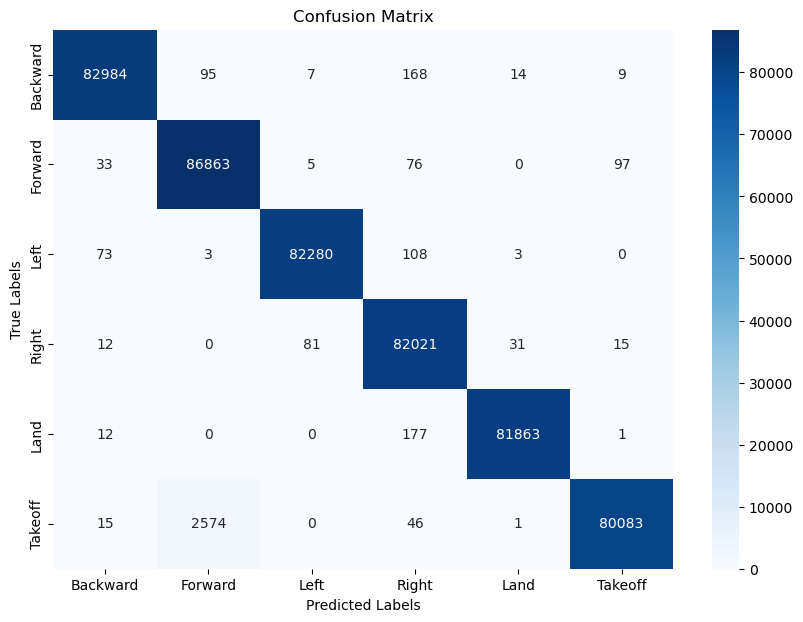

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Backward', 'Forward', 'Left', 'Right', 'Land', 'Takeoff'], yticklabels=['Backward', 'Forward', 'Left', 'Right', 'Land', 'Takeoff'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig('ConfusionMatrix.png')
plt.show()
